In [64]:
import tensorflow as tf 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten 
from keras.optimizers import Adam 

# to calcuate the accuracy 
from sklearn.metrics import accuracy_score

# To visualize the data
import matplotlib.pyplot as plt 
import numpy as np 



In [97]:
# use this snippet of code 
# Set random seed for reproducibility:
# np.random.seed(42) ensures NumPy's random operations (like data shuffling) are reproducible.
# tf.random.set_seed(42) ensures TensorFlow's random operations (like weight initialization, dropout) are reproducible.
# np.random.seed(42)
# tf.random.set_seed(42)


In [66]:
# Load the dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
# discovering the data 
print(x_train.shape) # 6000 images 28*28 pixels
print(y_train.shape) # the label which is the digit in the image 6 or 4 or 5



(60000, 28, 28)
(60000,)


In [70]:
# what is the type of the data 
type(x_train)

numpy.ndarray

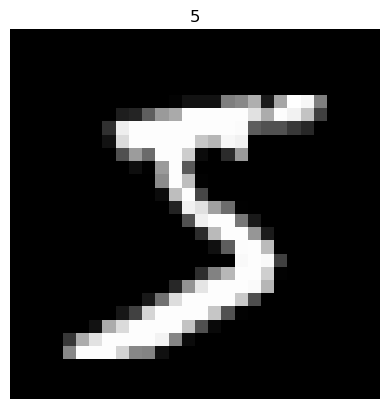

In [72]:
plt.imshow(x_train[0], cmap = 'gray' )
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [74]:
# Reshape to (28, 28, 1) to add a channel dimension for compatibility with CNN layer
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [76]:
# Normalize images to scale pixel values to [0, 1], which speeds up training and stabilizes gradients
# Ensure data types are compatible with the model, e.g., normalized images should be float32, not int.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [78]:
# Convert labels to one-hot encoded format, representing each category as a unique binary vector
# note one hot encoding produces more features
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [80]:
y_train.shape

(60000, 10)

In [82]:
# Conv2D: A 2D convolution layer used in CNNs to extract features from images.
# Strides (1, 1): The filter moves 1 step at a time horizontally and vertically. 
# You can specify different strides for height and width using a tuple.
# Padding:
# - same: The output has the same dimensions as the input (with padding added).
# - valid: No padding, resulting in a smaller output size.

In [84]:
# Adam optimizer with:
# - learning_rate=0.001: Step size for weight updates
# - beta_1=0.9: Exponential decay rate for first moment estimate (momentum)
# - beta_2=0.999: Exponential decay rate for second moment estimate (RMSProp)
# - epsilon=1e-07: Small value to prevent division by zero
# - amsgrad=False: Disables the AMSGrad variant
# - name='Adam': Name of the optimizer

In [86]:
# Building the cnn model 
model = Sequential() # a linear stack of layers, layers are added one by one in specific order 
# Conv layer 
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))
# pooling 
# Pooling with a (1, 1) window will not reduce the size of the input and will result in the output having the same spatial dimensions (height and width) as the input.
model.add(MaxPooling2D(pool_size=(1,1)))
#flatten the output from the previous layers 
model.add(Flatten())
# FCN
model.add(Dense(100, activation='relu')) 
# output layer 
model.add(Dense(10, activation='softmax')) # softmax used for multi classification 
# Optimizer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad= False, name= 'Adam')
# Compile model 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# train the model with 10 ephocs
model.fit(x_train, y_train, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9040 - loss: 0.3074 - val_accuracy: 0.9701 - val_loss: 0.0939
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9821 - val_loss: 0.0647
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 50ms/step - accuracy: 0.9937 - loss: 0.0218 - val_accuracy: 0.9820 - val_loss: 0.0667
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9840 - val_loss: 0.0706
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9804 - val_loss: 0.0791
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9832 - val_loss: 0.0766
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9841 - val_loss: 0.0793
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9986 - 

In [95]:
# batch size is important when you have large dataset
# if batch_size = 128 were added it processes 128 samples at a time during evaluation
results = model.evaluate(x_test, y_test, batch_size = 128)
print('test loss, test acc:', results)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0989
test loss, test acc: [0.08636830002069473, 0.9828000068664551]


In [ ]:
# '79/79' indicates all 79 batches have been processed. 
# '━━━━━━━━━━━━━━━━━━━━' is a progress bar showing completion.
# '0s' shows the total time taken for the operation was almost 0 seconds.
# '3ms/step' means each batch took an average of 3 milliseconds to process.

In [99]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 19600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │     1,960,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,884,082 (22.45 MB)

 Trainable params: 1,961,360 (7.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,922,722 (14.96 MB)